# CSI simulated data


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)  # to display all columns of dataframes

## Read the csv data

We use the following profile of data.  
`PGE-SASH-4101`:
* Zip Code: 95122 *San Jose, California* https://goo.gl/maps/zCsdjqUbtYF2
* Capacity (kW AC-CEC): 2.9

In [2]:
%%time
csvname = 'PGE-SASH-4101'
path_to_csv = '../data/CSIsimulation/'+csvname+'.csv'
df = pd.read_csv(path_to_csv, header=0,parse_dates=[0])

CPU times: user 39 s, sys: 176 ms, total: 39.2 s
Wall time: 39.7 s


In [3]:
df.head()

,Period Beginning (UTC -08:00),Energy (kWh)
0,2011-01-01 00:00:00,0.0
1,2011-01-01 00:15:00,0.0
2,2011-01-01 00:30:00,0.0
3,2011-01-01 00:45:00,0.0
4,2011-01-01 01:00:00,0.0


In [4]:
df.dtypes, df.columns, df.shape

(Period Beginning (UTC -08:00)    datetime64[ns]
 Energy (kWh)                            float64
 dtype: object,
 Index(['Period Beginning (UTC -08:00)', 'Energy (kWh)'], dtype='object'),
 (210432, 2))

Data contains datatime `Period Beginning (UTC -08:00)` and production level `Energy (kWh)` by 15-min resolution

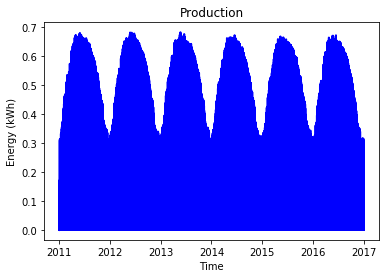

In [5]:
bp_x = df['Period Beginning (UTC -08:00)']
bp_y = df['Energy (kWh)']

# Make the plot
plt.plot(bp_x, bp_y, linewidth=2, linestyle="-",
         color="blue") # , label=r"Legend label $\sin(x)$"
plt.xlabel(r"Time")
plt.ylabel(r"Energy (kWh)")
plt.title(r"Production")
# plt.legend(loc="lower left")
plt.show()

In [6]:
# production per day
df.groupby(pd.Grouper(key='Period Beginning (UTC -08:00)',freq='D')).sum().head()

,Energy (kWh)
Period Beginning (UTC -08:00),
2011-01-01,1.18919
2011-01-02,1.52982
2011-01-03,2.59788
2011-01-04,3.68834
2011-01-05,3.78789


In [7]:
# df[(df['Period Beginning (UTC -08:00)'].dt.hour == 1) & (df['Period Beginning (UTC -08:00)'].dt.minute == 15)].head()

## Divide the data by seasons

We split the data by seasons:
* Spring: 3-5
* Summer: 6-8
* Fall: 9-11
* Winter: 12-2

In [8]:
# extract winter season
winter = [12,1,2]
df_winter = df[df['Period Beginning (UTC -08:00)'].dt.month.isin(winter)]
df_winter.head()

,Period Beginning (UTC -08:00),Energy (kWh)
0,2011-01-01 00:00:00,0.0
1,2011-01-01 00:15:00,0.0
2,2011-01-01 00:30:00,0.0
3,2011-01-01 00:45:00,0.0
4,2011-01-01 01:00:00,0.0


In [9]:
# convert to power (kW) and reshape 
pv_winter = df_winter['Energy (kWh)'].values*4 # to convert average power (kW)
pv_winter = pv_winter.reshape(-1,96)
pv_winter.shape

(542, 96)

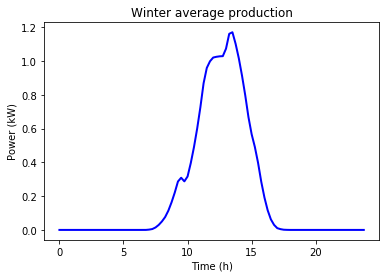

In [10]:
stages = np.linspace(start=0,stop=23.75,num=96)
plt.plot(stages, pv_winter.mean(axis=0), linewidth=2, linestyle="-",
         color="blue") # , label=r"Legend label $\sin(x)$"
plt.xlabel(r"Time (h)")
plt.ylabel(r"Power (kW)")
plt.title(r"Winter average production")
plt.show()

In [11]:
# do same for the other seasons
summer = [6,7,8];fall = [9,10,11];spring = [3,4,5]
pv_summer = df[df['Period Beginning (UTC -08:00)'].dt.month.isin(summer)]['Energy (kWh)'].values*4 # to convert average power (kW)
pv_summer = pv_summer.reshape(-1,96)
pv_fall = df[df['Period Beginning (UTC -08:00)'].dt.month.isin(fall)]['Energy (kWh)'].values*4 # to convert average power (kW)
pv_fall = pv_fall.reshape(-1,96)
pv_spring = df[df['Period Beginning (UTC -08:00)'].dt.month.isin(spring)]['Energy (kWh)'].values*4 # to convert average power (kW)
pv_spring = pv_spring.reshape(-1,96)

pv_summer.shape,pv_fall.shape, pv_spring.shape

((552, 96), (546, 96), (552, 96))

## some simple analysis

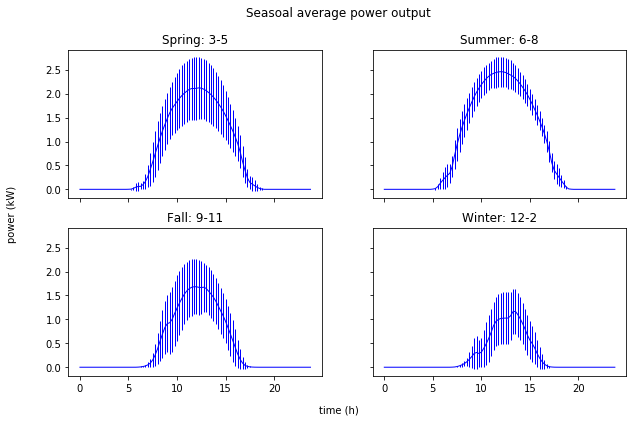

In [12]:
# plot the mean production with standard deviation
f, axarr = plt.subplots(2, 2,figsize=(10, 6), sharex=True, sharey=True)
axarr[0,0].errorbar(stages,pv_spring.mean(axis=0), yerr=pv_spring.std(axis=0), linewidth=1, linestyle="-",color="blue")
axarr[0, 0].set_title('Spring: 3-5')

axarr[0,1].errorbar(stages,pv_summer.mean(axis=0), yerr=pv_summer.std(axis=0), linewidth=1, linestyle="-",color="blue")
axarr[0,1].set_title('Summer: 6-8')

axarr[1,0].errorbar(stages,pv_fall.mean(axis=0), yerr=pv_fall.std(axis=0), linewidth=1, linestyle="-",color="blue")
axarr[1,0].set_title('Fall: 9-11')

axarr[1,1].errorbar(stages,pv_winter.mean(axis=0), yerr=pv_winter.std(axis=0), linewidth=1, linestyle="-",color="blue")
axarr[1,1].set_title('Winter: 12-2')

f.text(0.5, 0.04, 'time (h)', ha='center')
f.text(0.04, 0.5, 'power (kW)', va='center', rotation='vertical')
f.suptitle("Seasoal average power output")
plt.show()

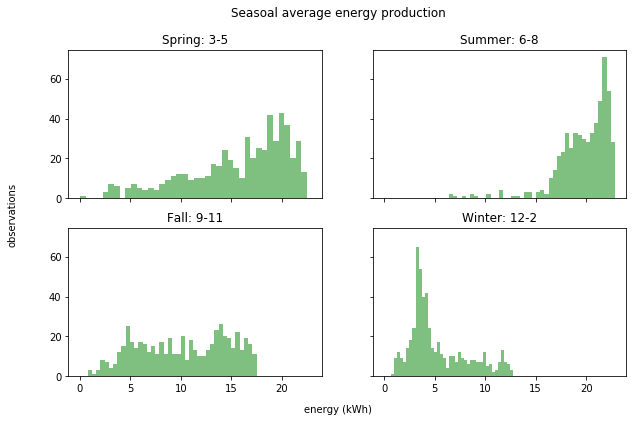

In [13]:
# histogram of the average production per day
num_bins = 40
f, axarr = plt.subplots(2, 2,figsize=(10, 6), sharex=True, sharey=True)
axarr[0,0].hist(pv_spring.sum(axis=1)/4, num_bins, facecolor="green", alpha=0.5)
axarr[0, 0].set_title('Spring: 3-5')

axarr[0,1].hist(pv_summer.sum(axis=1)/4, num_bins, facecolor="green", alpha=0.5)
axarr[0,1].set_title('Summer: 6-8')

axarr[1,0].hist(pv_fall.sum(axis=1)/4, num_bins,  facecolor="green", alpha=0.5)
axarr[1,0].set_title('Fall: 9-11')

axarr[1,1].hist(pv_winter.sum(axis=1)/4, num_bins, facecolor="green", alpha=0.5)
axarr[1,1].set_title('Winter: 12-2')

f.text(0.5, 0.04, 'energy (kWh)', ha='center')
f.text(0.04, 0.5, 'observations', va='center', rotation='vertical')
f.suptitle("Seasoal average energy production")
plt.show()

#### Observation
* Production level varies greatly depending on the season. 
* The standard deviation during **summer** is the smallest (histogram is centered) -> **nice to model the PV scenario generator**

In [14]:
# save as csv
# writecsvname = csvname + '_winter.csv'
# pd.DataFrame(pv_winter).to_csv(writecsvname, header=False, index=False)
# writecsvname = csvname + '_summer.csv'
# pd.DataFrame(pv_summer).to_csv(writecsvname, header=False, index=False)

In [15]:
# plt.plot(stages, pv_summer.mean(axis=0), linewidth=2, linestyle="-",
#          color="blue") # , label=r"Legend label $\sin(x)$"
# plt.show()

In [16]:
# fall = [9,10,11];spring = [3,4,5]
# df_fall = df[df['Period Beginning (UTC -08:00)'].dt.month.isin(fall)]
# pv_fall = df_fall['Energy (kWh)'].values*4 # to convert average power (kW)
# pv_fall = pv_fall.reshape(-1,96)
# df_spring = df[df['Period Beginning (UTC -08:00)'].dt.month.isin(spring)]
# pv_spring = df_spring['Energy (kWh)'].values*4 # to convert average power (kW)
# pv_spring = pv_spring.reshape(-1,96)

# pv_fall.shape, pv_spring.shape